Important parameters:

*   Number of instances: 302
*   Number of attributes: 14 continuous attributes

Each of the attributes:

*   age: age in year
*   sex: sex (1=male, 0 = female)
*   cp: chest pain type (value 1:typical angina, value 2: atypical angina, value3: non-aginal pain, value4: asymtomatic)
*   trestbps: Resting blood pressure (in mmhg on admission to the hospital)
*   chol: serum cholesterol in mg/dl
*   fbs: fast blood sugar > 120mg/dl (1=true, 0=false)
*   restecg: Resting electrocardiographic results (0=normal, 1=having ST-T wave abnormally (T wave inversions and/or st elevation or depression of >0.05mg, 2=showing probabal. or difinite left venticular hypertrophy by Estes criteria)
*   thalach: Maximum heart rate achieved 
*   exang: Exercise included angina (1=yes, 0=No)
*   oldpeak: ST depression induced by exercise relative to rest
*   slope: the slop of the peak exercise ST segment (Value 1= upsloping, value 2= flat, value 3= downsloping)
*   ca: Number of major vessels (0-3) coloured by flourosopy
*   thal: 3=normal, 6=fixed defect, 7=reversable defect
*   HeartDisease: Diognosis of heart disease- angiprahic disease status ( value 0 =  < 50% diameter narrowing, value 1= > 50% diameter narrowing) in any major vessel: attributes 59 through 68 are vessels

















In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Data Science/heart_disease_classify

/content/drive/My Drive/Data Science/heart_disease_classify


In [7]:
#import data
HDNames = ['age', 'sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','hal','HeartDisease']
Data = pd.read_excel('Ch3.ClevelandData.xlsx', names=HDNames)

In [8]:
print(Data.head(10))
print(Data.info())
summary = Data.describe()
print(summary)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   67    1   4       160   286    0        2      108      1      1.5      2   
1   67    1   4       120   229    0        2      129      1      2.6      2   
2   37    1   3       130   250    0        0      187      0      3.5      3   
3   41    0   2       130   204    0        2      172      0      1.4      1   
4   56    1   2       120   236    0        0      178      0      0.8      1   
5   62    0   4       140   268    0        2      160      0      3.6      3   
6   57    0   4       120   354    0        0      163      1      0.6      1   
7   63    1   4       130   254    0        2      147      0      1.4      2   
8   53    1   4       140   203    1        2      155      1      3.1      3   
9   57    1   4       140   192    0        0      148      0      0.4      2   

  ca hal  HeartDisease  
0  3   3             1  
1  2   7             1  
2  0   3             0  
3  0   3

In [9]:
import numpy as np

In [10]:
DataNew = Data.replace('?', np.nan)

In [11]:
print(DataNew.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            298 non-null    float64
 12  hal           300 non-null    float64
 13  HeartDisease  302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.2 KB
None


In [12]:
print(DataNew.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.410596    0.678808    3.165563  131.645695  246.738411    0.145695   
std      9.040163    0.467709    0.953612   17.612202   51.856829    0.353386   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     55.500000    1.000000    3.000000  130.000000  241.500000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  298.000000   
mean     0.986755  149.605960    0.327815    1.035430    1.596026    0.674497   
std      0.994916   22.9129

In [13]:
print(DataNew.isnull().sum())

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
hal             2
HeartDisease    0
dtype: int64


In [14]:
DataNew = DataNew.dropna()

In [17]:
print(DataNew.isnull().sum())

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hal             0
HeartDisease    0
dtype: int64


Data Scaling:

x(scaled) = (x-mean)/sd

Mean = 0, standard deviation = 1,

*   value > mean will have +z score
*   value < mean will have -z score



In [18]:
InputNames = HDNames
InputNames.pop()

'HeartDisease'

In [19]:
Input = pd.DataFrame(DataNew.iloc[:, 0:13], columns = InputNames)

In [20]:
Input.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal
0,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
1,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
2,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
3,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
4,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0


In [21]:
Target = pd.DataFrame(DataNew.iloc[:, 13], columns = ['HeartDisease'])

In [22]:
Target.head(5)

,HeartDisease
0,1
1,1
2,0
3,0
4,0


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [24]:
print(scaler.fit(Input))

StandardScaler()


In [25]:
InputScaled = scaler.fit_transform(Input)

In [26]:
InputScaled = pd.DataFrame(InputScaled, columns = InputNames)
summary = InputScaled.describe()
summary = summary.transpose()
print(summary)

          count          mean       std       min       25%       50%  \
age       296.0 -2.550512e-16  1.001693 -2.823438 -0.720814  0.164501   
sex       296.0  6.001206e-18  1.001693 -1.443376 -1.443376  0.692820   
cp        296.0  1.860374e-16  1.001693 -2.263690 -0.173043 -0.173043   
trestbps  296.0  1.920386e-16  1.001693 -2.121540 -0.656413 -0.092903   
chol      296.0  6.601326e-17  1.001693 -2.334999 -0.700097 -0.084604   
fbs       296.0  2.700542e-17  1.001693 -0.406638 -0.406638 -0.406638   
restecg   296.0 -4.800964e-17  1.001693 -1.000046 -1.000046  0.006803   
thalach   296.0  2.160434e-16  1.001693 -3.426010 -0.723490  0.148291   
exang     296.0  1.342770e-16  1.001693 -0.698167 -0.698167 -0.698167   
oldpeak   296.0  6.001206e-17  1.001693 -0.903324 -0.903324 -0.215962   
slope     296.0 -6.901386e-17  1.001693 -0.975788 -0.975788  0.656038   
ca        296.0  1.200241e-17  1.001693 -0.723832 -0.723832 -0.723832   
hal       296.0 -1.800362e-16  1.001693 -0.891149 -

In [27]:
import matplotlib.pyplot as plt

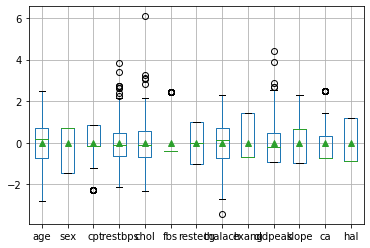

In [28]:
boxplot = InputScaled.boxplot(column = InputNames, showmeans = True)

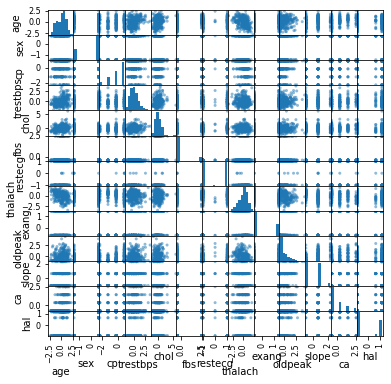

In [30]:
pd.plotting.scatter_matrix(InputScaled, figsize=(6,6))
plt.show()

In [31]:
coreData = InputScaled.corr(method = 'pearson')
with pd.option_context('display.max_rows', None, 'display.max_columns', coreData.shape[1]):
  print(coreData)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.094802  0.118743  0.288805  0.203846  0.125821   
sex      -0.094802  1.000000  0.014272 -0.068212 -0.197629  0.033539   
cp        0.118743  0.014272  1.000000 -0.031599  0.070606 -0.040004   
trestbps  0.288805 -0.068212 -0.031599  1.000000  0.132380  0.176636   
chol      0.203846 -0.197629  0.070606  0.132380  1.000000  0.015132   
fbs       0.125821  0.033539 -0.040004  0.176636  0.015132  1.000000   
restecg   0.147193  0.031618  0.072291  0.147075  0.166298  0.061255   
thalach  -0.395204 -0.060586 -0.342089 -0.049199 -0.000058 -0.008067   
exang     0.098919  0.145444  0.375759  0.068578  0.058744  0.004878   
oldpeak   0.194405  0.104357  0.213564  0.189078  0.039676 -0.000472   
slope     0.153807  0.028328  0.171151  0.116556 -0.007164  0.029783   
ca        0.365356  0.093769  0.232361  0.099967  0.115387  0.159755   
hal       0.124787  0.382707  0.276014  0.136750  0.011481  0.05

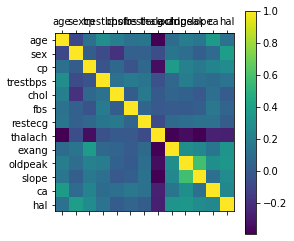

In [32]:
plt.matshow(coreData)
plt.xticks(range(len(coreData.columns)), coreData.columns)
plt.yticks(range(len(coreData.columns)), coreData.columns)
plt.colorbar()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
Input_train, Input_test, Target_train, Target_test = train_test_split(InputScaled, Target, test_size = 0.30, random_state = 5)
print(Input_train.shape)
print(Input_test.shape)
print(Target_train.shape)
print(Target_test.shape)

(207, 13)
(89, 13)
(207, 1)
(89, 1)


Create a keras sequential model:

*   Import the sequential class from keras.models
*   stack the layers using the .add() method
*   configure the learning process and using the .compile() method
*   Train the model on teh training dataset using the .fit() method



In [37]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(30, input_dim = 13, activation = 'tanh')) #input 
model.add(Dense(20, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])


Three arguments are passed:

1. The dam optimizer: An algorithm for the first-order gradiant-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments
2. The binary crossentrophy loss function: we will use logarithomic loss, which for binary classification problem is defined in keras as binary crossentrophy
3. The accuracy matrics: A metric is a function that is used to evaluate the performance  of your model during training and testing

In [38]:
model.fit(Input_train, Target_train, epochs=1000, verbose=1)

Epoch 1/1000
7/7 [==============================] - 2s 4ms/step - loss: 0.6144 - accuracy: 0.7053
Epoch 2/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.5272 - accuracy: 0.7681
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7826
Epoch 4/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.4335 - accuracy: 0.8213
Epoch 5/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.4088 - accuracy: 0.8261
Epoch 6/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.3917 - accuracy: 0.8309
Epoch 7/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.3804 - accuracy: 0.8357
Epoch 8/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.3718 - accuracy: 0.8309
Epoch 9/1000
7/7 [==============================] - 0s 5ms/step - loss: 0.3635 - accuracy: 0.8309
Epoch 10/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.3575 - accuracy: 0.8357
Epoch 11/1000
7/7 [

1. Input_train: Array of input train data
2. Target_train: Array of target (label) data
3. epochs = 1000: Number of epochs to train the model, an epoch is an iteration over the entire x and y data provided
4. verbose = 1: An integer, either 0, 1 or 2. verbose mode: 0 = silent, 1=progress bar, 2= one line per epoch 

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [40]:
score = model.evaluate(Input_test, Target_test, verbose = 0)
print('keras Model accuracy = ', score[1])

keras Model accuracy =  0.8314606547355652


In [41]:
Target_classification = model.predict(Input_test)
Target_classification = (Target_classification > 0.5)

3/3 [==============================] - 0s 4ms/step


In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Target_test, Target_classification))

[[37  5]
 [10 37]]


Here we got 37+37 = 74 observations correctly (from 89 test data) classified by making 15 errors  with an accuracy equal to 0.83

### Thank you